In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#as we see in feature selection which feature important
data_copy=data.copy()

#Features = ['age',time','ejection_fraction','serum_creatinine']
#x = data_copy[Features]
#y = data_copy["DEATH_EVENT"]

x = data_copy.iloc[:, [0,4,7,11]].values
y = data_copy.iloc[:,-1].values

In [4]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [5]:
#feature engineering
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### LOGISTIC REGRESSION


In [6]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [7]:
# Predicting the test set

y_pred=lg.predict(x_test)

In [8]:
#making confusion matrix and calculatin accuracy score
mylist=[]
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
mylist.append(ac)
print(ac)
print(cm)

0.8222222222222222
[[58  4]
 [12 16]]


### K NEAREST NEIGHBOR


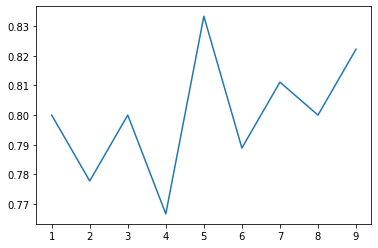

In [9]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
list1=[]

for neighbours in range(1,10):
    classifier=KNeighborsClassifier(n_neighbors=neighbours,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    list1.append(ac)
plt.plot(list(range(1,10)),list1)
plt.show()

In [10]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[58  4]
 [11 17]]
0.8333333333333334


#### SUPPORT VECTOR CLASSIFIER


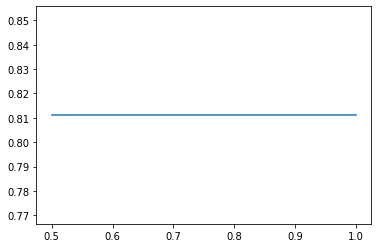

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
list2=[]
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list2.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list2)
plt.show()

In [14]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.6, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.6, random_state=0)

In [15]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[57  5]
 [12 16]]
0.8111111111111111



### DECISION TREE CLASSIFIER


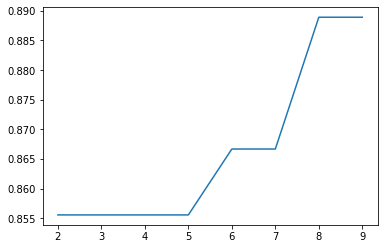

In [17]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
plt.show()

In [18]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 4, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=4, random_state=0)

In [19]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[59  3]
 [10 18]]
0.8555555555555555


### RANDOM FOREST CLASSIFCATION


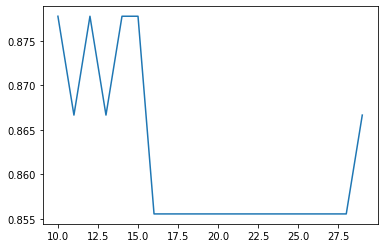

In [21]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [22]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [23]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[59  3]
 [ 8 20]]
0.8777777777777778


### XG Boost

[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/deepak/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/deepak/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/deepak/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarni

[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/deepak/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/deepak/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/deepak/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarni

[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


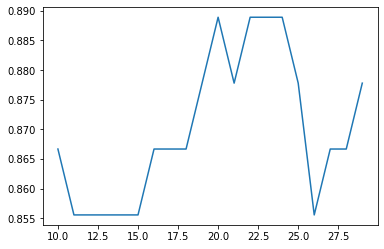

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [26]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

[13:27:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/deepak/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[58  4]
 [ 8 20]]
0.8666666666666667


### CATBOOST

In [29]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Learning rate set to 0.00528
0:	learn: 0.6885312	total: 49.4ms	remaining: 49.3s
1:	learn: 0.6845346	total: 50.6ms	remaining: 25.2s
2:	learn: 0.6796891	total: 51.4ms	remaining: 17.1s
3:	learn: 0.6764066	total: 52.4ms	remaining: 13s
4:	learn: 0.6724907	total: 53.4ms	remaining: 10.6s
5:	learn: 0.6685104	total: 54.4ms	remaining: 9.01s
6:	learn: 0.6646376	total: 55.4ms	remaining: 7.86s
7:	learn: 0.6605930	total: 56.5ms	remaining: 7s
8:	learn: 0.6557686	total: 57.2ms	remaining: 6.3s
9:	learn: 0.6514806	total: 58ms	remaining: 5.74s
10:	learn: 0.6474580	total: 58.7ms	remaining: 5.28s
11:	learn: 0.6438506	total: 59.5ms	remaining: 4.9s
12:	learn: 0.6405683	total: 60.2ms	remaining: 4.57s
13:	learn: 0.6372551	total: 60.9ms	remaining: 4.29s
14:	learn: 0.6341427	total: 61.6ms	remaining: 4.04s
15:	learn: 0.6310766	total: 62.4ms	remaining: 3.83s
16:	learn: 0.6277587	total: 63.7ms	remaining: 3.68s
17:	learn: 0.6245146	total: 64.7ms	remaining: 3.53s
18:	learn: 0.6212566	total: 65.7ms	remaining: 3.39s
19

209:	learn: 0.3227066	total: 243ms	remaining: 916ms
210:	learn: 0.3218771	total: 245ms	remaining: 916ms
211:	learn: 0.3214502	total: 246ms	remaining: 915ms
212:	learn: 0.3207998	total: 247ms	remaining: 914ms
213:	learn: 0.3198193	total: 248ms	remaining: 912ms
214:	learn: 0.3191199	total: 250ms	remaining: 912ms
215:	learn: 0.3185159	total: 251ms	remaining: 911ms
216:	learn: 0.3180224	total: 252ms	remaining: 909ms
217:	learn: 0.3171498	total: 253ms	remaining: 906ms
218:	learn: 0.3164534	total: 254ms	remaining: 904ms
219:	learn: 0.3159463	total: 254ms	remaining: 902ms
220:	learn: 0.3152291	total: 255ms	remaining: 900ms
221:	learn: 0.3146644	total: 256ms	remaining: 898ms
222:	learn: 0.3139809	total: 257ms	remaining: 895ms
223:	learn: 0.3130226	total: 258ms	remaining: 893ms
224:	learn: 0.3125006	total: 259ms	remaining: 891ms
225:	learn: 0.3121270	total: 260ms	remaining: 891ms
226:	learn: 0.3113073	total: 261ms	remaining: 889ms
227:	learn: 0.3108458	total: 262ms	remaining: 887ms
228:	learn: 

419:	learn: 0.2346237	total: 422ms	remaining: 583ms
420:	learn: 0.2344052	total: 425ms	remaining: 585ms
421:	learn: 0.2340038	total: 426ms	remaining: 584ms
422:	learn: 0.2337337	total: 427ms	remaining: 583ms
423:	learn: 0.2334552	total: 428ms	remaining: 582ms
424:	learn: 0.2332855	total: 429ms	remaining: 580ms
425:	learn: 0.2329818	total: 430ms	remaining: 579ms
426:	learn: 0.2325250	total: 430ms	remaining: 578ms
427:	learn: 0.2323545	total: 431ms	remaining: 576ms
428:	learn: 0.2320905	total: 432ms	remaining: 575ms
429:	learn: 0.2317553	total: 433ms	remaining: 574ms
430:	learn: 0.2312929	total: 434ms	remaining: 573ms
431:	learn: 0.2309844	total: 435ms	remaining: 572ms
432:	learn: 0.2306204	total: 436ms	remaining: 571ms
433:	learn: 0.2304975	total: 436ms	remaining: 569ms
434:	learn: 0.2303772	total: 438ms	remaining: 568ms
435:	learn: 0.2299068	total: 441ms	remaining: 571ms
436:	learn: 0.2298233	total: 442ms	remaining: 570ms
437:	learn: 0.2295362	total: 443ms	remaining: 569ms
438:	learn: 

630:	learn: 0.1857528	total: 604ms	remaining: 353ms
631:	learn: 0.1855525	total: 605ms	remaining: 352ms
632:	learn: 0.1853458	total: 606ms	remaining: 351ms
633:	learn: 0.1852203	total: 606ms	remaining: 350ms
634:	learn: 0.1849288	total: 607ms	remaining: 349ms
635:	learn: 0.1846571	total: 608ms	remaining: 348ms
636:	learn: 0.1845051	total: 609ms	remaining: 347ms
637:	learn: 0.1842079	total: 610ms	remaining: 346ms
638:	learn: 0.1840204	total: 610ms	remaining: 345ms
639:	learn: 0.1839210	total: 611ms	remaining: 344ms
640:	learn: 0.1837195	total: 612ms	remaining: 343ms
641:	learn: 0.1833641	total: 613ms	remaining: 342ms
642:	learn: 0.1832047	total: 613ms	remaining: 341ms
643:	learn: 0.1831893	total: 614ms	remaining: 340ms
644:	learn: 0.1830103	total: 615ms	remaining: 338ms
645:	learn: 0.1828973	total: 616ms	remaining: 337ms
646:	learn: 0.1828584	total: 617ms	remaining: 336ms
647:	learn: 0.1827993	total: 617ms	remaining: 335ms
648:	learn: 0.1826985	total: 618ms	remaining: 334ms
649:	learn: 

842:	learn: 0.1521624	total: 784ms	remaining: 146ms
843:	learn: 0.1520678	total: 785ms	remaining: 145ms
844:	learn: 0.1519614	total: 786ms	remaining: 144ms
845:	learn: 0.1518792	total: 787ms	remaining: 143ms
846:	learn: 0.1517369	total: 788ms	remaining: 142ms
847:	learn: 0.1514545	total: 789ms	remaining: 141ms
848:	learn: 0.1512223	total: 789ms	remaining: 140ms
849:	learn: 0.1511087	total: 790ms	remaining: 139ms
850:	learn: 0.1508990	total: 791ms	remaining: 138ms
851:	learn: 0.1505997	total: 792ms	remaining: 138ms
852:	learn: 0.1505283	total: 793ms	remaining: 137ms
853:	learn: 0.1503944	total: 793ms	remaining: 136ms
854:	learn: 0.1502645	total: 794ms	remaining: 135ms
855:	learn: 0.1501269	total: 795ms	remaining: 134ms
856:	learn: 0.1498979	total: 796ms	remaining: 133ms
857:	learn: 0.1498530	total: 797ms	remaining: 132ms
858:	learn: 0.1497187	total: 797ms	remaining: 131ms
859:	learn: 0.1495581	total: 798ms	remaining: 130ms
860:	learn: 0.1493678	total: 799ms	remaining: 129ms
861:	learn: 

In [30]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[58  4]
 [ 8 20]]
0.8666666666666667


In [32]:
# Plotting accuracy score of different models
mylist

[0.8222222222222222,
 0.8333333333333334,
 0.8111111111111111,
 0.8555555555555555,
 0.8777777777777778,
 0.8666666666666667,
 0.8666666666666667]

In [33]:
mylist2 = ["Logistic Regression", "KNearestNeighbours","SupportVector","DecisionTree","RandomForest", "XGBOOST","CATBOOST"]

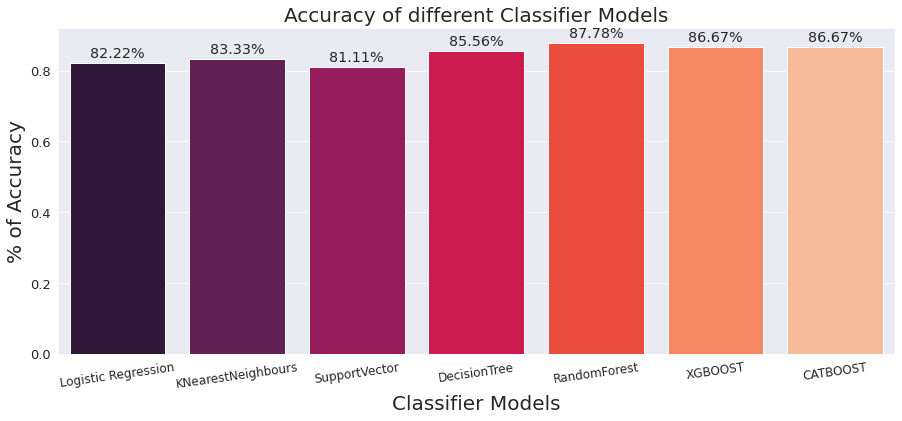

In [36]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()